In [1]:
import pandas as pd
import pandas_datareader as pdr
# import pandas_datareader.nasdaq_trader as nasdaq
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt



# import torch
# import torch.nn as nn
# import torch.autograd as autograd
# import torch.nn.functional as F

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

In [23]:
start_day = datetime(2013, 1, 1)
end_day = datetime(2021, 12, 31)
num_of_days = (end_day - start_day).days
print(num_of_days)

3286


In [42]:
# tickers = ['AAPL','IBM','GOOG','BP','XOM','COST','GS'] 
tickers = ['BTC-USD','ETH-USD','ADA-USD','BNB-USD','SOL-USD','MATIC-USD','LUNA-USD']
data = pdr.get_data_yahoo(tickers, 
                 start=start_day, 
                 end=end_day)

D:\Anaconda3\envs\TIL2021\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'SOL-USD', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
D:\Anaconda3\envs\TIL2021\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'LUNA-USD', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


In [53]:
close = data['Adj Close']

In [54]:
close

Symbols,BTC-USD,ETH-USD,ADA-USD,BNB-USD,MATIC-USD,SOL-USD,LUNA-USD
Date,,,,,,,
2014-09-17,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21,398.821014,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-12-08,50504.796875,4439.357910,1.397074,607.592773,2.418730,NaN,NaN
2021-12-09,47672.121094,4119.815918,1.290440,571.648987,2.090278,NaN,NaN
2021-12-10,47243.304688,3908.496094,1.211689,552.966858,2.097674,NaN,NaN


## Getting RSI values (ideally per block update but let's try day prices, window by days

In [97]:



def get_technical_indicators(dataset, ticker, to_prefix = True):
    return_df = pd.DataFrame(columns=['ma7','ma21','26ema','12ema','ema','MACD','20sd','upper_band','lower_band'
                                         'momentum', 'log_momentum'
                                     ])
    
    print(dataset.head(10))
    
    # Create 7 and 21 days Moving Average
    prefix = ("{}_".format(ticker) if to_prefix else "")
    print(f"prefix: {prefix}")
    ma7_col = prefix + 'ma7'
    ma21_col = prefix + 'ma21'
    _26ema_col = prefix + '26ema'
    _12ema_col = prefix + '12ema'
    MACD_col = prefix + 'MACD'
    _20sd_col = prefix + '20sd'
    upper_band_col = prefix + 'upper_band'
    lower_band_col = prefix + 'lower_band'
    ema_col = prefix + 'ema'
    momentum_col = prefix + 'momentum'
    log_momentum_col = prefix + 'log_momentum'
    
    dataset[ma7_col] = dataset[ticker].rolling(window=7).mean()
    dataset[ma21_col] = dataset[ticker].rolling(window=21).mean()
    
    # Create MACD
    dataset[_26ema_col] = dataset[ticker].ewm(span=26, adjust=True).mean()
    dataset[_12ema_col] = dataset[ticker].ewm(span=12, adjust=True).mean()
    print(dataset[_12ema_col].iloc[0])
    dataset[MACD_col] = (dataset[_12ema_col]-dataset[_26ema_col])

    # Create Bollinger Bands
    dataset[_20sd_col] = dataset[ticker].rolling(20).std()
    dataset[upper_band_col] = dataset[ma21_col] + (dataset[_20sd_col]*2)
    dataset[lower_band_col] = dataset[ma21_col] - (dataset[_20sd_col]*2)
    
    # Create Exponential moving average
    dataset[ema_col] = dataset[ticker].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset[momentum_col] = dataset[ticker].diff(1)   #dataset[priceCol]-1
    dataset[log_momentum_col] = dataset[ticker].pct_change(1)    #np.log(dataset['momentum'])#dataset['momentum'].apply(lambda x: )
    
    return dataset


In [55]:
for ticker in tickers:
#     print(close)
    dataset_TI_df = get_technical_indicators(close[[ticker]], ticker=ticker, to_prefix=True)   #data[[('Close', 'AMD')]]
    dataset_TI_df.drop(columns=[ticker], inplace=True)
    close = pd.concat([close,dataset_TI_df], axis=1)

Symbols        BTC-USD
Date                  
2014-09-17  457.334015
2014-09-18  424.440002
2014-09-19  394.795990
2014-09-20  408.903992
2014-09-21  398.821014
2014-09-22  402.152008
2014-09-23  435.790985
2014-09-24  423.204987
2014-09-25  411.574005
2014-09-26  404.424988
prefix: BTC-USD_
457.3340148925781
Symbols     ETH-USD
Date               
2014-09-17      NaN
2014-09-18      NaN
2014-09-19      NaN
2014-09-20      NaN
2014-09-21      NaN
2014-09-22      NaN
2014-09-23      NaN
2014-09-24      NaN
2014-09-25      NaN
2014-09-26      NaN
prefix: ETH-USD_
nan
Symbols     ADA-USD
Date               
2014-09-17      NaN
2014-09-18      NaN
2014-09-19      NaN
2014-09-20      NaN
2014-09-21      NaN
2014-09-22      NaN
2014-09-23      NaN
2014-09-24      NaN
2014-09-25      NaN
2014-09-26      NaN
prefix: ADA-USD_
nan
Symbols     BNB-USD
Date               
2014-09-17      NaN
2014-09-18      NaN
2014-09-19      NaN
2014-09-20      NaN
2014-09-21      NaN
2014-09-22      NaN
2014-09

C:\Users\FACEST~1\AppData\Local\Temp/ipykernel_34792/918582033.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[ma7_col] = dataset[ticker].rolling(window=7).mean()
C:\Users\FACEST~1\AppData\Local\Temp/ipykernel_34792/918582033.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[ma21_col] = dataset[ticker].rolling(window=21).mean()
C:\Users\FACEST~1\AppData\Local\Temp/ipykernel_34792/918582033.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [ ]:
close.tail(30)

In [106]:

def RSI(cur_close,window=7, min_thresh = 30, max_thresh = 70):

    def RSI_formula(mean_gain,mean_loss):
    #     small_val = 1e-6
    #     if mean_gain == 0:
    #         mean_gain = small_val
    #     if mean_loss == 0:
    #         mean_loss = small_val
        return 100-(100/(1 + (abs(mean_gain)/abs(mean_loss))))

    for ticker in tickers:
        small_val = 1e-6
        pct_chg_col = "{}_pct_change".format(ticker)
        pct_gain_col = "{}_mean_gain".format(ticker)
        pct_loss_col = "{}_mean_loss".format(ticker)
        ma7_gain_col = "{}_ma7_gain".format(ticker)
        ma7_loss_col = "{}_ma7_loss".format(ticker)
        rsi_X_col = "{}_RSI{}".format(ticker,window)
    #     to_concat = pd.DataFrame(cols=[pct_chg_col,])
        pct_chg = cur_close[ticker].pct_change(1)
#         print(len(pct_chg))
#         print(pct_chg)
        cur_close['miao'] = 0
        cur_close[pct_chg_col] = cur_close[ticker].pct_change(1)
        cur_close[pct_gain_col] = cur_close[pct_chg_col].apply(lambda x: x if x > 0 else small_val)
        cur_close[pct_loss_col] = cur_close[pct_chg_col].apply(lambda x: x if x < 0 else small_val)
        cur_close[ma7_gain_col] = cur_close[pct_gain_col].rolling(window=7).mean()
        cur_close[ma7_loss_col] = cur_close[pct_loss_col].rolling(window=7).mean()
        cur_close[rsi_X_col] = RSI_formula(cur_close[ma7_gain_col],cur_close[ma7_loss_col])
        cur_close["{}_RSI{}_B".format(ticker,window)] = cur_close[rsi_X_col] < min_thresh
        cur_close["{}_RSI{}_S".format(ticker,window)] = cur_close[rsi_X_col] > max_thresh
    #     close = pd.concat([close,cur_close], axis=1)
    return cur_close
new_close = RSI(close, window=24,min_thresh=10,max_thresh=90)

In [107]:
new_close.describe(include="all")

Symbols,BTC-USD,ETH-USD,ADA-USD,BNB-USD,MATIC-USD,SOL-USD,LUNA-USD,BTC-USD_ma7,BTC-USD_ma21,BTC-USD_26ema,BTC-USD_12ema,BTC-USD_MACD,BTC-USD_20sd,BTC-USD_upper_band,BTC-USD_lower_band,BTC-USD_ema,BTC-USD_momentum,BTC-USD_log_momentum,ETH-USD_ma7,ETH-USD_ma21,ETH-USD_26ema,ETH-USD_12ema,ETH-USD_MACD,ETH-USD_20sd,ETH-USD_upper_band,ETH-USD_lower_band,ETH-USD_ema,ETH-USD_momentum,ETH-USD_log_momentum,ADA-USD_ma7,ADA-USD_ma21,ADA-USD_26ema,ADA-USD_12ema,ADA-USD_MACD,ADA-USD_20sd,ADA-USD_upper_band,ADA-USD_lower_band,ADA-USD_ema,ADA-USD_momentum,ADA-USD_log_momentum,BNB-USD_ma7,BNB-USD_ma21,BNB-USD_26ema,BNB-USD_12ema,BNB-USD_MACD,BNB-USD_20sd,BNB-USD_upper_band,BNB-USD_lower_band,BNB-USD_ema,BNB-USD_momentum,BNB-USD_log_momentum,SOL-USD_ma7,SOL-USD_ma21,SOL-USD_26ema,SOL-USD_12ema,SOL-USD_MACD,SOL-USD_20sd,SOL-USD_upper_band,SOL-USD_lower_band,SOL-USD_ema,SOL-USD_momentum,SOL-USD_log_momentum,MATIC-USD_ma7,MATIC-USD_ma21,MATIC-USD_26ema,MATIC-USD_12ema,MATIC-USD_MACD,MATIC-USD_20sd,MATIC-USD_upper_band,MATIC-USD_lower_band,MATIC-USD_ema,MATIC-USD_momentum,MATIC-USD_log_momentum,LUNA-USD_ma7,LUNA-USD_ma21,LUNA-USD_26ema,LUNA-USD_12ema,LUNA-USD_MACD,LUNA-USD_20sd,LUNA-USD_upper_band,LUNA-USD_lower_band,LUNA-USD_ema,LUNA-USD_momentum,LUNA-USD_log_momentum,miao,BTC-USD_pct_change,BTC-USD_mean_gain,BTC-USD_mean_loss,BTC-USD_ma7_gain,BTC-USD_ma7_loss,BTC-USD_RSI7,ETH-USD_pct_change,ETH-USD_mean_gain,ETH-USD_mean_loss,ETH-USD_ma7_gain,ETH-USD_ma7_loss,ETH-USD_RSI7,ADA-USD_pct_change,ADA-USD_mean_gain,ADA-USD_mean_loss,ADA-USD_ma7_gain,ADA-USD_ma7_loss,ADA-USD_RSI7,BNB-USD_pct_change,BNB-USD_mean_gain,BNB-USD_mean_loss,BNB-USD_ma7_gain,BNB-USD_ma7_loss,BNB-USD_RSI7,SOL-USD_pct_change,SOL-USD_mean_gain,SOL-USD_mean_loss,SOL-USD_ma7_gain,SOL-USD_ma7_loss,SOL-USD_RSI7,MATIC-USD_pct_change,MATIC-USD_mean_gain,MATIC-USD_mean_loss,MATIC-USD_ma7_gain,MATIC-USD_ma7_loss,MATIC-USD_RSI7,LUNA-USD_pct_change,LUNA-USD_mean_gain,LUNA-USD_mean_loss,LUNA-USD_ma7_gain,LUNA-USD_ma7_loss,LUNA-USD_RSI7,BTC-USD_RSI7_B,BTC-USD_RSI7_S,ETH-USD_RSI7_B,ETH-USD_RSI7_S,ADA-USD_RSI7_B,ADA-USD_RSI7_S,BNB-USD_RSI7_B,BNB-USD_RSI7_S,SOL-USD_RSI7_B,SOL-USD_RSI7_S,MATIC-USD_RSI7_B,MATIC-USD_RSI7_S,LUNA-USD_RSI7_B,LUNA-USD_RSI7_S,BTC-USD_RSI24,BTC-USD_RSI24_B,BTC-USD_RSI24_S,ETH-USD_RSI24,ETH-USD_RSI24_B,ETH-USD_RSI24_S,ADA-USD_RSI24,ADA-USD_RSI24_B,ADA-USD_RSI24_S,BNB-USD_RSI24,BNB-USD_RSI24_B,BNB-USD_RSI24_S,SOL-USD_RSI24,SOL-USD_RSI24_B,SOL-USD_RSI24_S,MATIC-USD_RSI24,MATIC-USD_RSI24_B,MATIC-USD_RSI24_S,LUNA-USD_RSI24,LUNA-USD_RSI24_B,LUNA-USD_RSI24_S
count,2640.000000,2316.000000,1530.000000,1598.000000,777.000000,0.0,0.0,2634.000000,2620.000000,2640.000000,2640.000000,2640.000000,2621.000000,2620.000000,2620.000000,2640.000000,2639.000000,2639.000000,2310.000000,2296.000000,2316.000000,2316.000000,2316.000000,2297.000000,2296.000000,2296.000000,2316.000000,2315.000000,2315.000000,1524.000000,1510.000000,1530.000000,1530.000000,1530.000000,1511.000000,1510.000000,1510.000000,1530.000000,1529.000000,1529.000000,1592.000000,1578.000000,1598.000000,1598.000000,1598.000000,1579.000000,1578.000000,1578.000000,1598.000000,1597.000000,1597.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,747.000000,687.000000,956.000000,956.000000,956.000000,691.000000,687.000000,687.000000,956.000000,772.000000,955.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2640.0,2639.000000,2640.000000,2640.000000,2634.000000,2634.000000,2634.000000,2315.000000,2640.000000,2640.000000,2.634000e+03,2634.000000,2634.000000,1529.000000,2640.000000,2640.000000,2634.000000,2634.000000,2634.000000,1597.000000,2640.000000,2640.000000,2634.000000,2634.000000,2634.000000,0.0,2.640000e+03,2.640000e+03,2634.000000,2634.000000,2634.0,955.000000,2640.000000,2640.000000,2.634000e+03,2634.000000,2634.000000,0.0,2.640000e+03,2.640000e+03,2634.000000,2634.000000,2634.000000,2640,2640,2640,2640,2640,2640,2640,2640,2640,2640,2640,2640,2640,2640,2634.000000,2640,2640,2634.000000,2640,2640,2634.000000,2640,2640,2634.0

In [63]:
close.tail(30)

Symbols,BTC-USD,ETH-USD,ADA-USD,BNB-USD,MATIC-USD,SOL-USD,LUNA-USD,BTC-USD_ma7,BTC-USD_ma21,BTC-USD_26ema,BTC-USD_12ema,BTC-USD_MACD,BTC-USD_20sd,BTC-USD_upper_band,BTC-USD_lower_band,BTC-USD_ema,BTC-USD_momentum,BTC-USD_log_momentum,ETH-USD_ma7,ETH-USD_ma21,ETH-USD_26ema,ETH-USD_12ema,ETH-USD_MACD,ETH-USD_20sd,ETH-USD_upper_band,ETH-USD_lower_band,ETH-USD_ema,ETH-USD_momentum,ETH-USD_log_momentum,ADA-USD_ma7,ADA-USD_ma21,ADA-USD_26ema,ADA-USD_12ema,ADA-USD_MACD,ADA-USD_20sd,ADA-USD_upper_band,ADA-USD_lower_band,ADA-USD_ema,ADA-USD_momentum,ADA-USD_log_momentum,BNB-USD_ma7,BNB-USD_ma21,BNB-USD_26ema,BNB-USD_12ema,BNB-USD_MACD,BNB-USD_20sd,BNB-USD_upper_band,BNB-USD_lower_band,BNB-USD_ema,BNB-USD_momentum,BNB-USD_log_momentum,SOL-USD_ma7,SOL-USD_ma21,SOL-USD_26ema,SOL-USD_12ema,SOL-USD_MACD,SOL-USD_20sd,SOL-USD_upper_band,SOL-USD_lower_band,SOL-USD_ema,SOL-USD_momentum,SOL-USD_log_momentum,MATIC-USD_ma7,MATIC-USD_ma21,MATIC-USD_26ema,MATIC-USD_12ema,MATIC-USD_MACD,MATIC-USD_20sd,MATIC-USD_upper_band,MATIC-USD_lower_band,MATIC-USD_ema,MATIC-USD_momentum,MATIC-USD_log_momentum,LUNA-USD_ma7,LUNA-USD_ma21,LUNA-USD_26ema,LUNA-USD_12ema,LUNA-USD_MACD,LUNA-USD_20sd,LUNA-USD_upper_band,LUNA-USD_lower_band,LUNA-USD_ema,LUNA-USD_momentum,LUNA-USD_log_momentum,miao,BTC-USD_pct_change,BTC-USD_mean_gain,BTC-USD_mean_loss,BTC-USD_ma7_gain,BTC-USD_ma7_loss,BTC-USD_RSI7,ETH-USD_pct_change,ETH-USD_mean_gain,ETH-USD_mean_loss,ETH-USD_ma7_gain,ETH-USD_ma7_loss,ETH-USD_RSI7,ADA-USD_pct_change,ADA-USD_mean_gain,ADA-USD_mean_loss,ADA-USD_ma7_gain,ADA-USD_ma7_loss,ADA-USD_RSI7,BNB-USD_pct_change,BNB-USD_mean_gain,BNB-USD_mean_loss,BNB-USD_ma7_gain,BNB-USD_ma7_loss,BNB-USD_RSI7,SOL-USD_pct_change,SOL-USD_mean_gain,SOL-USD_mean_loss,SOL-USD_ma7_gain,SOL-USD_ma7_loss,SOL-USD_RSI7,MATIC-USD_pct_change,MATIC-USD_mean_gain,MATIC-USD_mean_loss,MATIC-USD_ma7_gain,MATIC-USD_ma7_loss,MATIC-USD_RSI7,LUNA-USD_pct_change,LUNA-USD_mean_gain,LUNA-USD_mean_loss,LUNA-USD_ma7_gain,LUNA-USD_ma7_loss,LUNA-USD_RSI7
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-11-13,64469.527344,4651.460449,2.053104,650.104126,1.754877,NaN,NaN,65205.186384,62696.060826,62061.908793,63948.989040,1887.080247,2257.960694,67211.982213,58180.139439,64475.090565,313.585938,0.004888,4693.263602,4457.025844,4374.407353,4592.597012,218.189659,229.098638,4915.223120,3998.828568,4661.446989,-15.654785,-0.003354,2.100853,2.043386,2.082039,2.069102,-0.012937,0.086154,2.215694,1.871079,2.057034,0.007338,0.003587,637.410958,566.804426,565.011185,610.811535,45.800350,65.523734,697.851894,435.756958,642.409469,23.461609,0.037440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.784343,1.846007,1.746747,1.799368,0.052622,0.121806,2.089618,1.602395,1.746043,0.039177,0.022834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.004888,0.004888,0.000001,0.014442,-0.007320,66.363268,-0.003354,0.000001,-0.003354,0.011952,-0.007660,60.944174,0.003587,0.003587,0.000001,0.018869,-0.014617,56.348722,0.037440,0.037440,0.000001,0.012811,-0.009390,57.703064,NaN,0.000001,0.000001,0.000001,0.000001,50.0,0.022834,0.022834,0.000001,0.008529,-0.018180,31.932662,NaN,0.000001,0.000001,0.000001,0.000001,50.0
2021-11-14,65466.839844,4626.358887,2.040853,650.918091,1.729668,NaN,NaN,65510.879464,62912.061012,62314.125908,64182.504548,1868.378640,2336.275076,67584.611164,58239.510860,65136.256751,997.312500,0.015470,4694.092773,4482.666597,4393.070429,4597.791146,204.720717,223.052761,4928.772119,4036.561075,4638.054921,-25.101562,-0.005396,2.103564,2.039454,2.078988,2.064756,-0.014232,0.082570,2.204594,1.874314,2.046247,-0.012251,-0.005967,637.477251,575.103710,571.374660,616.981774,45.607114,64.488736,704.081182,446.126238,648.081884,0.813965,0.001252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.762280,1.853432,1.745481,1.788645,0.043164,0.117952,2.089337,1.617527,1.735126,-0.025209,-0.014365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.01547

In [64]:
rsi_cols = close.columns.str.endswith('RSI7')
close.loc[:, rsi_cols].tail(100)

Symbols,BTC-USD_RSI7,ETH-USD_RSI7,ADA-USD_RSI7,BNB-USD_RSI7,SOL-USD_RSI7,MATIC-USD_RSI7,LUNA-USD_RSI7
Date,,,,,,,
2021-09-04,61.113627,87.708155,49.456911,58.290377,50.0,72.832711,50.0
2021-09-05,72.123001,90.266295,55.665614,65.954430,50.0,71.848564,50.0
2021-09-06,98.623305,88.520037,60.472820,78.416333,50.0,81.942867,50.0
2021-09-07,50.133907,52.142789,33.885483,34.148420,50.0,54.697070,50.0
2021-09-08,37.696727,32.597249,23.497832,17.895993,50.0,42.999231,50.0
2021-09-09,36.666606,31.451009,18.830067,23.952478,50.0,47.648773,50.0
2021-09-10,27.172343,13.927281,15.071760,17.215909,50.0,42.412411,50.0
2021-09-11,29.653771,20.396447,41.841635,14.201473,50.0,10.441461,50.0
2021-09-12,23.857786,27.389294,34.850972,18.609855,50.0,14.723770,50.0


False    671
True      57
Name: BTC-USD_RSI7_S, dtype: int64
sold at: 2019-12-12 00:00:00
bought at: 2019-12-17 00:00:00
sold at: 2020-01-30 00:00:00
bought at: 2020-03-12 00:00:00
sold at: 2021-01-08 00:00:00
bought at: 2021-01-21 00:00:00
sold at: 2021-02-09 00:00:00
bought at: 2021-02-28 00:00:00
sold at: 2021-03-13 00:00:00
bought at: 2021-03-25 00:00:00
sold at: 2021-04-14 00:00:00
bought at: 2021-06-21 00:00:00
sold at: 2021-10-20 00:00:00
count    728.000000
mean      56.572466
std       23.519623
min        0.004829
25%       40.682665
50%       56.908201
75%       75.050563
max       99.997557
Name: BTC-USD_RSI7, dtype: float64


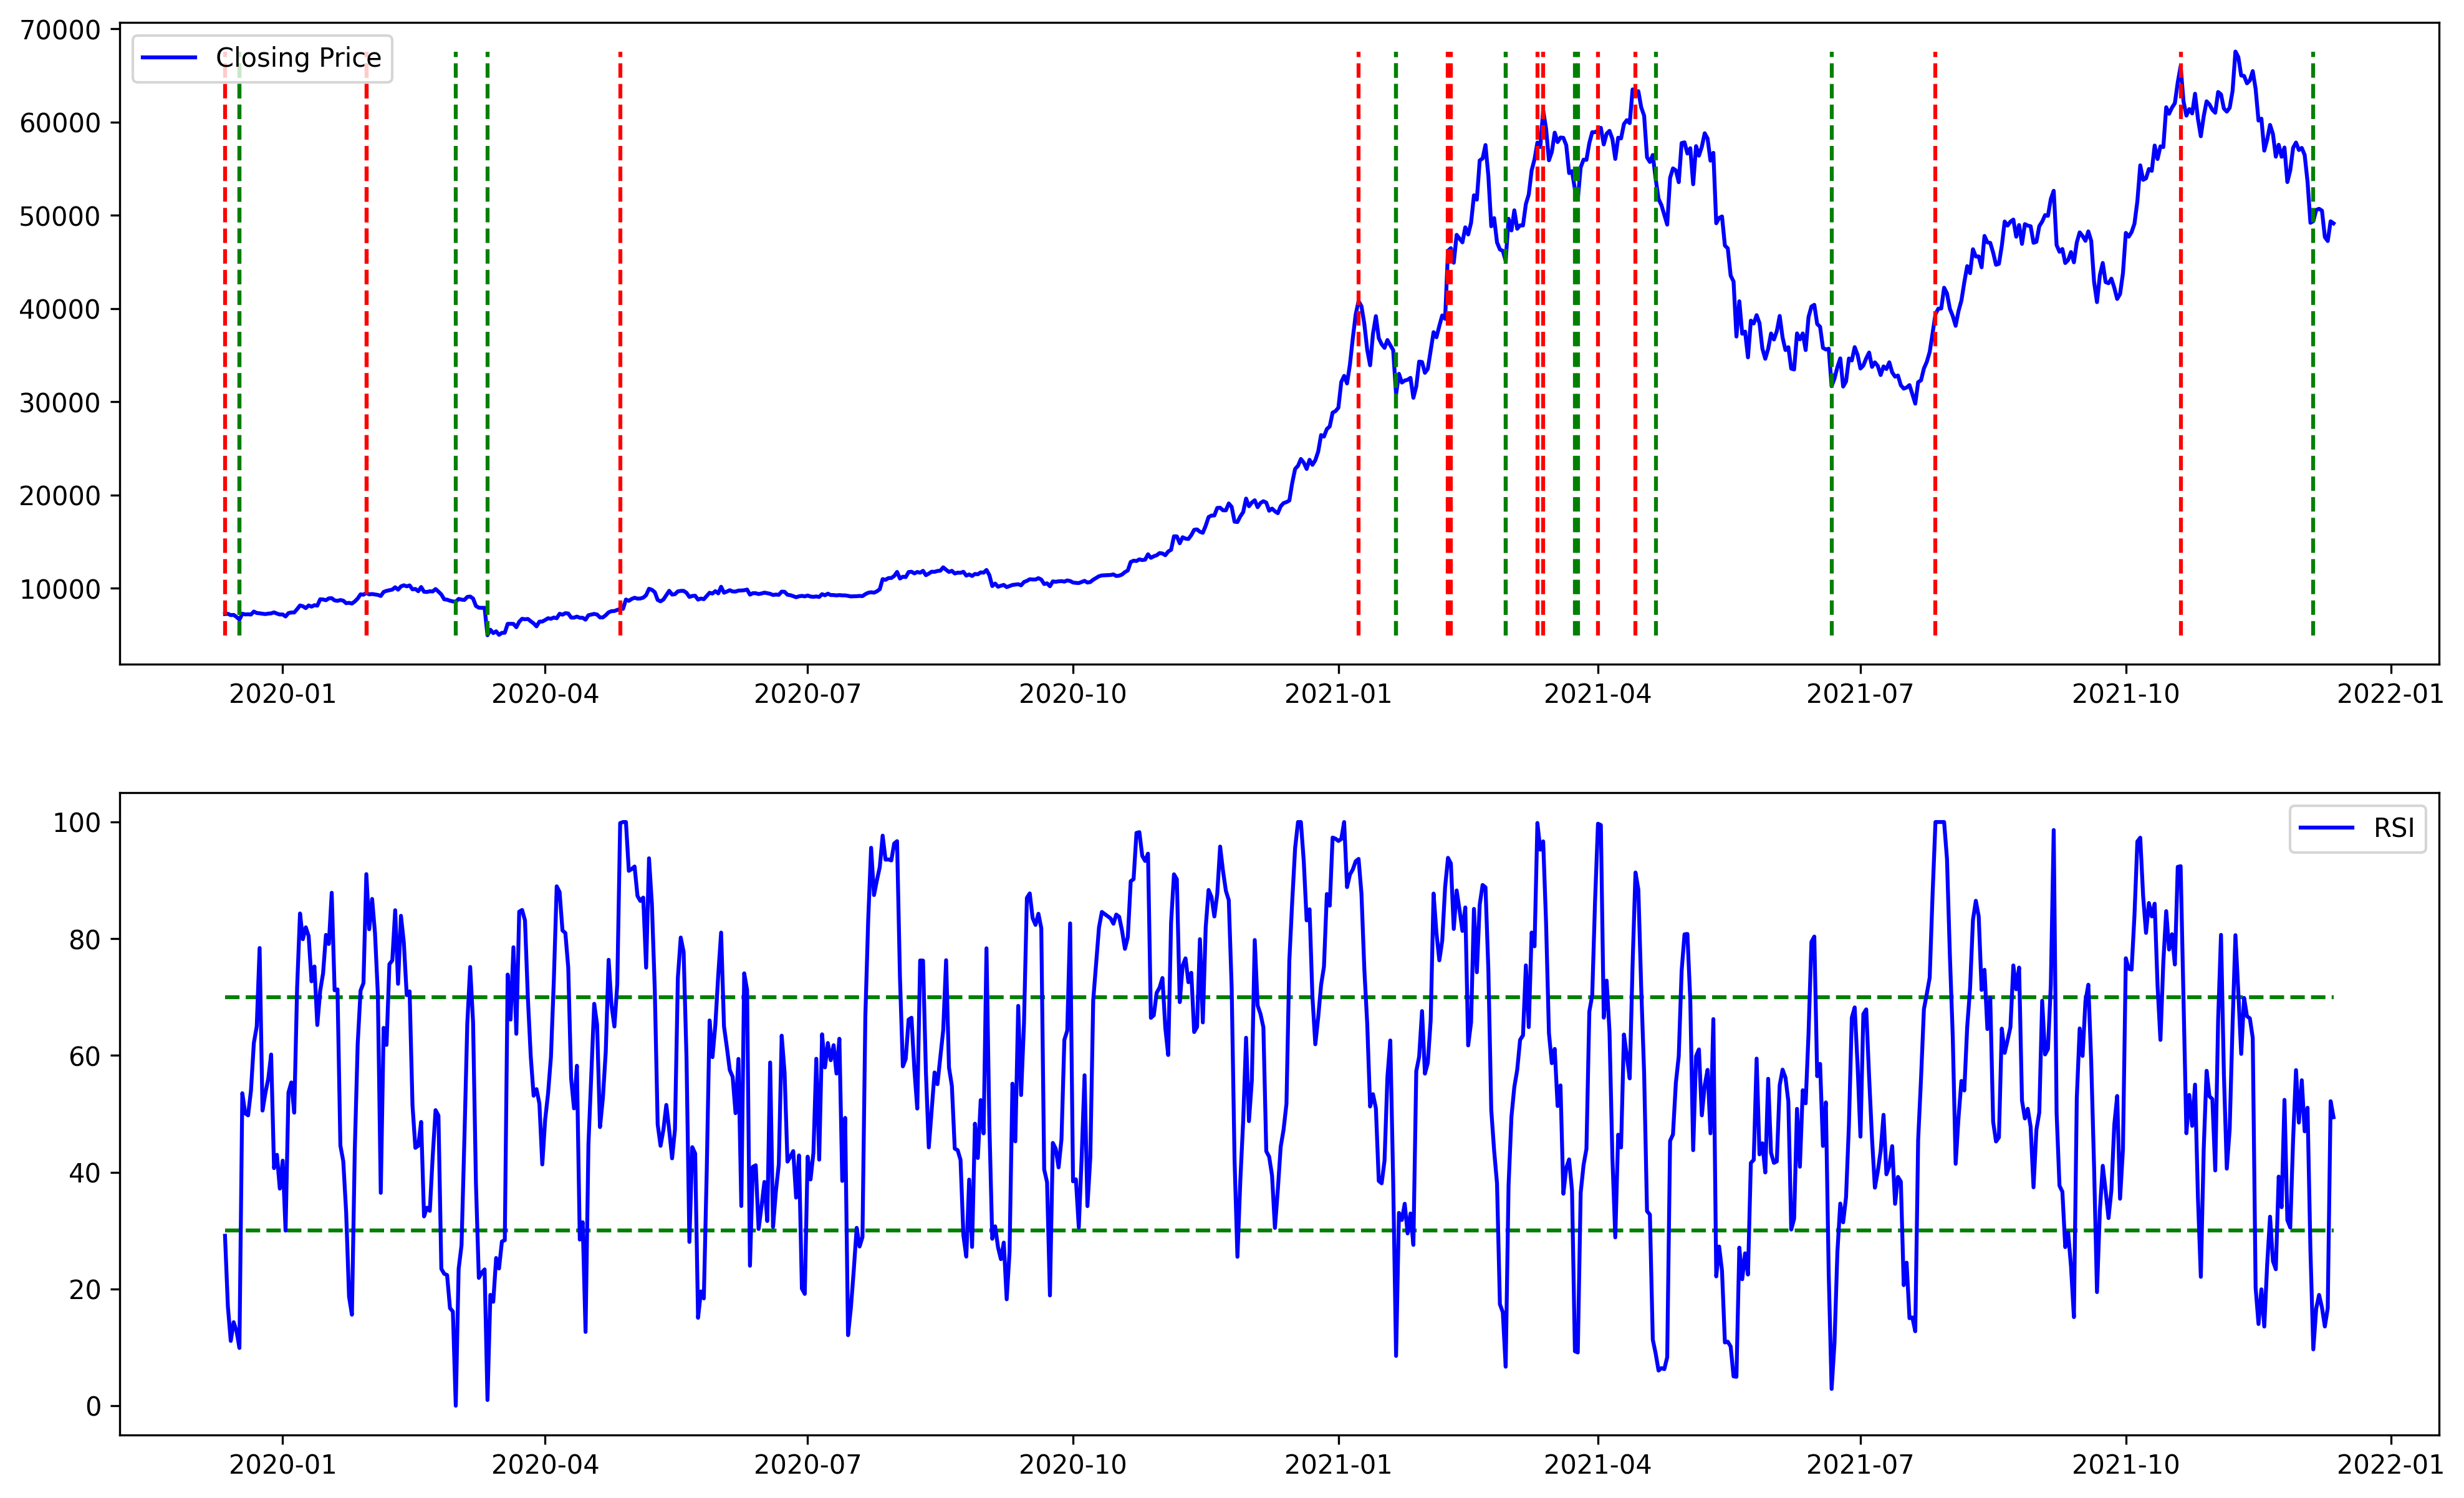

In [108]:
cur_ticker = tickers[0]

cur_close = close.iloc[-728:] #-728

rsi_col = "{}_RSI7".format(cur_ticker)
buy_col = "{}_RSI7_B".format(cur_ticker)
print(cur_close[sell_col].value_counts())
rsi_buy = cur_close[cur_close[buy_col]]
sell_col = "{}_RSI7_S".format(cur_ticker)
rsi_sell = cur_close[cur_close[sell_col]]

plt.figure(figsize=(16, 10), dpi=300)
plt.subplot(2, 1, 1)
plt.plot(cur_close[cur_ticker],label='Closing Price', color='b')

min_close = cur_close[cur_ticker].min()
max_close = cur_close[cur_ticker].max()


prev_action = 'H'
prev_date = cur_close.index[0]#None
for idx, row in cur_close.iterrows():
    to_buy = row[buy_col]
    to_sell = row[sell_col]
    action = 'B' if to_buy else 'S'
    if not to_buy and not to_sell:
        action = 'H'
    if action == 'B':
        if prev_action != action:
            print(f"sold at: {prev_date}")
            plt.vlines(prev_date,  min_close, max_close, colors='r', linestyles='--')
            plt.vlines(idx, min_close, max_close, colors='g', linestyles='--')
            prev_action = 'B'
        prev_date = idx
    elif action == 'S':
        if prev_action != action:
            print(f"bought at: {prev_date}")
            plt.vlines(prev_date,  min_close, max_close, colors='g', linestyles='--')
            plt.vlines(idx,  min_close, max_close, colors='r', linestyles='--')
            prev_action = 'S'
        prev_date = idx
        
# for idx, row in rsi_buy.iterrows():
#     plt.vlines(idx, min_close, max_close, colors='g', linestyles='--')

# for idx, row in rsi_sell.iterrows():
#     plt.vlines(idx,  min_close, max_close, colors='r', linestyles='--')

plt.legend()

plt.subplot(2, 1, 2)    

print(cur_close[rsi_col].describe())

plt.hlines(70, cur_close.index[0],cur_close.index[len(cur_close.index) - 1],colors='g', linestyles='--')
plt.hlines(30, cur_close.index[0],cur_close.index[len(cur_close.index) - 1], colors='g', linestyles='--')
plt.plot(cur_close[rsi_col],label='RSI', color='b')

plt.legend()
plt.show()

In [ ]:
# Now try and buy and sell
# Just buy at the buy signals, sell at the sell signals. Cant short sell for now

usd_spent = 0
BTC_owned = 0

dca_window = 2
cur_day = 0
cur_close = close.iloc[-728:] 
for idx,  row in cur_close.iterrows():
    





## Examing signal generator

In [5]:
import numpy as np
import random
class Single_Signal_Generator:

    def __init__(self, total_timesteps, period_range, 
                    amplitude_range, noise_amplitude_ratio, sample_type="multi_sin_concat_with_base_whp",
                    base_period_ratio=(2, 4), base_amplitude_range=(20, 80)):

        self.total_timesteps = total_timesteps
        self.noise_amplitude_ratio = noise_amplitude_ratio
        self.period_range = period_range
        self.amplitude_range = amplitude_range
        self.base_period_range = (base_period_ratio[0]*period_range[1], base_period_ratio[1]*period_range[1])
        self.base_amplitude_range = base_amplitude_range
        self.base = False
        self.half_period = False
        self.loaded = False
        self.loaded_signals = None
        self.no_of_loaded_signals = None
        self.counter = 0

    def build_signals(self, no_of_samples, filename=None ,sample_type="multi_sin_concat_with_base_whp", full_episode=True):
        if self.loaded:
            print("Signals already loaded!")
            return None

        signals = np.zeros((self.total_timesteps, no_of_samples))
        for i in range(no_of_samples):
            signals[:, i] = self.sample().reshape((signals.shape[0]))
        
        if filename:
            np.save(filename, signals)

    def load(self, filename):
        self.loaded_signals = np.load(filename)
        self.loaded = True
        self.no_of_loaded_signals = self.loaded_signals.shape[1]

    def sample(self, sample_type="multi_sin_concat_with_base_whp", full_episode=True):

        if self.loaded:
            if self.counter == self.no_of_loaded_signals:
                print("All loaded signals returned. Starting from the first signal again.")
                self.counter = 0

            return self.loaded_signals[:, self.counter].reshape((self.total_timesteps, 1))
        else:
            if sample_type == "multi_sin_concat_with_base_whp":
                self.base = True
                self.half_period = True
                return self._sample_multi_sin()
            elif sample_type == "single_sin":
                self.base = False
                self.half_period = False
                return self._sample_single_sin()
            elif sample_type == "multi_sin_concat":
                return self._sample_multi_sin()
            elif sample_type == "multi_sin_concat_whp":
                self.half_period = True
                return self._sample_multi_sin()
            else:
                print("Cannot recognise type. Defaulting to 'multi_sin_concat_with_base_whp'.")
                self.half_period = True
                return self._sample_multi_sin()

        
    def _random_sin(self, base=False, full_episode=False):

        if base:
            period = random.randrange(self.base_period_range[0], self.base_period_range[1])
            amplitude = random.randrange(self.base_amplitude_range[0], self.base_amplitude_range[1])
            noise = 0
        else:
            period = random.randrange(self.period_range[0], self.period_range[1])
            amplitude = random.randrange(self.amplitude_range[0], self.amplitude_range[1])
            noise = self.noise_amplitude_ratio * amplitude

        if full_episode:
            length = self.total_timesteps
        else:
            if self.half_period:
                length = int(random.randrange(1,4) * 0.5 * period)
            else:
                length = period

        signal_value = 100. + amplitude * np.sin(np.array(range(length)) * 2 * 3.1416 / period)
        signal_value += np.random.random(signal_value.shape) * noise

        return signal_value

    def _sample_single_sin(self):
        sample_container = []

        sample, function_name = self._random_sin(full_episode=True)

        sample_container.append(sample)

        return np.array(sample_container).T

    def _sample_multi_sin(self):
        sample_container = []
        sample = []
        while True:
            sample = np.append(sample, self._random_sin(full_episode=False)[0])
            if len(sample) > self.total_timesteps:
                break

        if self.base:
            base = self._random_sin(base=True, full_episode=True)
            sample_container.append(sample[:self.total_timesteps] + base)
            return np.array(sample_container).T
        else:
            sample_container.append(sample[:self.total_timesteps])
            return np.array(sample_container).T

# if __name__ == '__main__':



In [12]:
num_samples = 10
signals = []
gen = Single_Signal_Generator(180, (10, 40), (5, 80), 0.5)
for idx in range(num_samples):
    
    gen.build_signals(1000)
    signals.append(gen.sample())
# filename = "Generated Signals.npy"
# gen.build_signals(filename, 1000)
# gen.load(filename)
# print(gen.sample())
# print(gen.loaded_signals.shape)

In [13]:
del gen

In [13]:
signals = np.array(signals)
print(signals.shape)

(10, 180, 1)


In [17]:
test = signals.reshape(signals.shape[0],signals.shape[1])

In [18]:
print(test.shape)

(10, 180)


In [14]:
min(test[0])

156.05333471398959

In [1]:
sig = [round(x, 4) for x in test[0]]
# sig
len(sig)

NameError: name 'test' is not defined

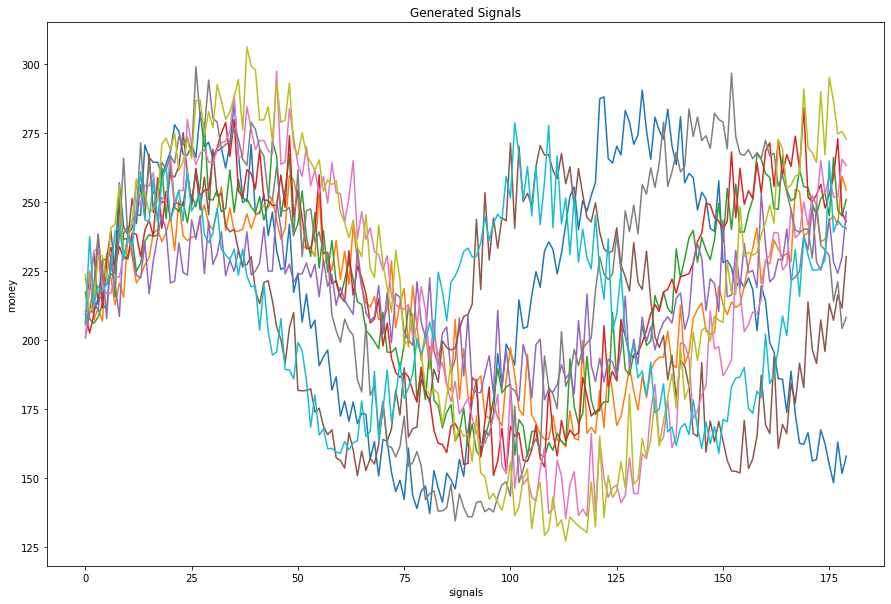

In [19]:
plt.figure(figsize = (15,10))
plt.title('Generated Signals')
plt.xlabel('signals')
plt.ylabel('money')
for sig in test:
    sig = [round(x, 4) for x in sig]
    plt.plot(sig)
plt.show()